In [1]:
from fastai.vision.all import *

In [2]:
Path.BASE_PATH = path = Path.home()/'paddy'
train_path = path/'train_images'
test_path = path/'test_images'

In [3]:
train_path.ls()

(#10) [Path('train_images/bacterial_leaf_streak'),Path('train_images/hispa'),Path('train_images/normal'),Path('train_images/blast'),Path('train_images/dead_heart'),Path('train_images/bacterial_leaf_blight'),Path('train_images/tungro'),Path('train_images/bacterial_panicle_blight'),Path('train_images/brown_spot'),Path('train_images/downy_mildew')]

In [4]:
path.ls()

(#4) [Path('train_images'),Path('train.csv'),Path('sample_submission.csv'),Path('test_images')]

In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [14]:
df.groupby(['label']).count()

,image_id,variety,age
label,,,
bacterial_leaf_blight,479,479,479
bacterial_leaf_streak,380,380,380
bacterial_panicle_blight,337,337,337
blast,1738,1738,1738
brown_spot,965,965,965
dead_heart,1442,1442,1442
downy_mildew,620,620,620
hispa,1594,1594,1594
normal,1764,1764,1764


In [7]:
img = PILImage.create(train_path/'bacterial_leaf_blight/100330.jpg')

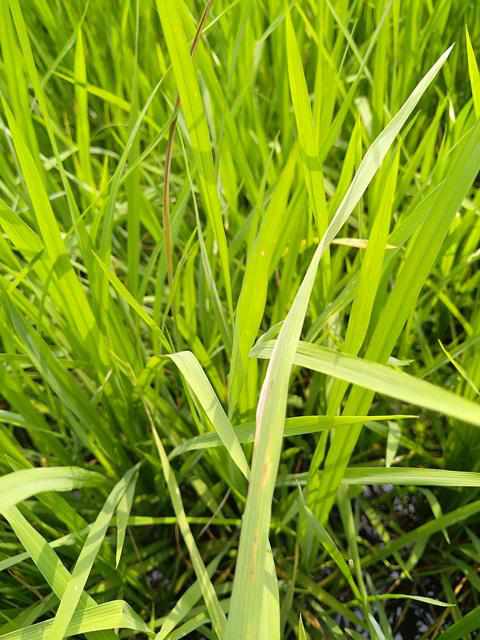

In [8]:
img

In [10]:
img.size

(480, 640)

In [15]:
files = get_image_files(train_path)
files

(#10407) [Path('train_images/bacterial_leaf_streak/100081.jpg'),Path('train_images/bacterial_leaf_streak/104135.jpg'),Path('train_images/bacterial_leaf_streak/108249.jpg'),Path('train_images/bacterial_leaf_streak/100235.jpg'),Path('train_images/bacterial_leaf_streak/105265.jpg'),Path('train_images/bacterial_leaf_streak/109925.jpg'),Path('train_images/bacterial_leaf_streak/106054.jpg'),Path('train_images/bacterial_leaf_streak/103307.jpg'),Path('train_images/bacterial_leaf_streak/106974.jpg'),Path('train_images/bacterial_leaf_streak/101151.jpg')...]

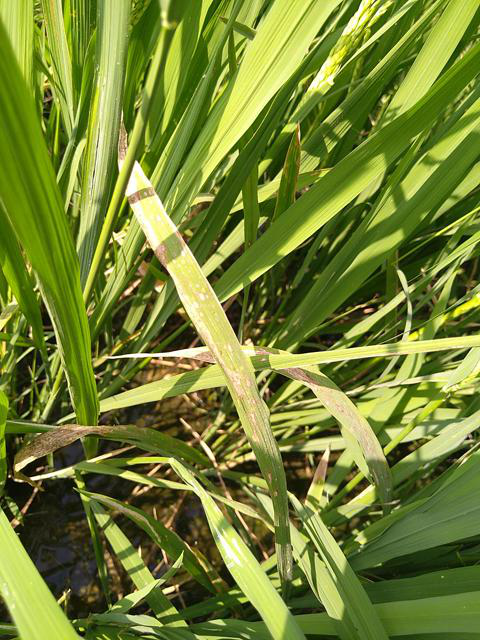

In [19]:
PILImage.create(files[1])

In [34]:
#min([PILImage.create(o).size[1] for o in files]) # all files are 640 x 480

[PILImage.create(o).size  for o in files[:10]]

[(480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640),
 (480, 640)]

In [35]:
df.variety.value_counts()

ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: variety, dtype: int64

In [46]:
dls = ImageDataLoaders.from_folder(
    train_path,  valid_pct=0.2, seed=42, item_tfms=Resize(224))

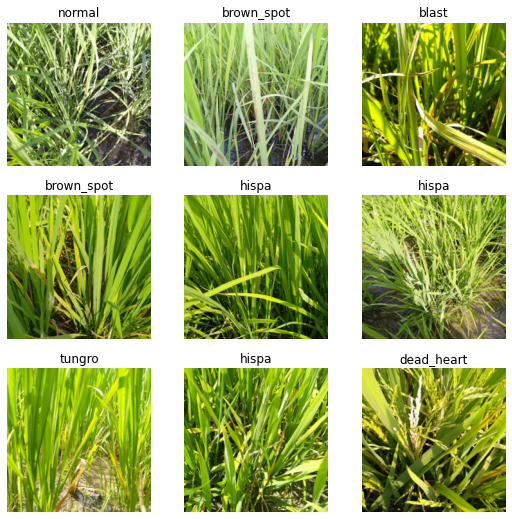

In [47]:
dls.show_batch()

In [48]:
learn = vision_learner(dls, resnet34, metrics=error_rate)


In [50]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.459205,0.434105,0.129745,00:39


epoch,train_loss,valid_loss,error_rate,time
0,0.336021,0.327610,0.095147,00:46
1,0.251915,0.269129,0.075444,00:47
2,0.134285,0.185162,0.054301,00:47
3,0.053764,0.168505,0.043248,00:46
4,0.028085,0.170358,0.042287,00:47
